<a href="https://colab.research.google.com/github/Kyoung-mii/DeepLearning/blob/main/04_DeepLearningTrainingTechniques/4_5_MNISTHandwrittenDigitRecognition_EarlyStopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) 학습 데이터의 준비 등 사전 작업

## 4-1 [1] 필요한 패키지 불러오기

In [4]:
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import Sequential, optimizers, callbacks
from tensorflow.keras.layers import Flatten, Dense

## 4-1 [2] 정확도 및 손실함수 시각화 함수 정의

In [11]:
def plot_metric(h, metric):
    train_history = h.history[metric]
    val_history = h.history['val_' + metric]
    epochs = range(1, len(train_history) + 1)
    plt.plot(epochs, train_history)
    plt.plot(epochs, val_history)
    plt.legend(['training ' + metric, 'validation ' + metric])
    plt.title('Training and validation ' + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.show()

## 4-1 [3] MNIST 데이터 로드 및 정규화

In [6]:
# MNIST 데이터베이스에서 훈련용 및 평가용 이미지와 레이블 로드
(train_imgs, train_labels), (test_imgs, test_labels) = \
        datasets.mnist.load_data()
# 픽셀 값을 0~1 사이로 정규화
train_imgs, test_imgs = train_imgs / 255.0, test_imgs / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 4-1 [4] 2층 피드포워드 네트워크 구성

In [7]:
# 모델 구성 후 요약 정보 출력
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = 'sigmoid'),
    Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## 4-1 [5] 모델 컴파일

In [8]:
model.compile(optimizer=optimizers.SGD(0.1, momentum = 0.9),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## 4-1 [6] 모델 학습

In [9]:
hist = model.fit(train_imgs, train_labels, epochs = 50, validation_split = 0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8389 - loss: 0.5128 - val_accuracy: 0.9490 - val_loss: 0.1715
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9558 - loss: 0.1432 - val_accuracy: 0.9649 - val_loss: 0.1167
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9713 - loss: 0.0955 - val_accuracy: 0.9718 - val_loss: 0.0952
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9796 - loss: 0.0672 - val_accuracy: 0.9724 - val_loss: 0.0912
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0522 - val_accuracy: 0.9714 - val_loss: 0.0901
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0405 - val_accuracy: 0.9736 - val_loss: 0.0835
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9913 - loss: 0.0322 - val_accuracy: 0.9751 - val_loss: 0.0840
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0265 -

## 4-1a [6] 조기 종료를 적용한 모델 학습

In [14]:
early_stop = callbacks.EarlyStopping(monitor = 'val_loss',
                                     min_delta = 0,
                                     patience = 10,
                                     verbose = 1,
                                     restore_best_weights = True)
hist = model.fit(train_imgs, train_labels, epochs=50,
                 callbacks = [early_stop], validation_split = 0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 7.5706e-04 - val_accuracy: 0.9776 - val_loss: 0.0899
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 6.9775e-04 - val_accuracy: 0.9776 - val_loss: 0.0898
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 6.7938e-04 - val_accuracy: 0.9778 - val_loss: 0.0899
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 6.9401e-04 - val_accuracy: 0.9778 - val_loss: 0.0901
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 6.6647e-04 - val_accuracy: 0.9780 - val_loss: 0.0900
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 6.3409e-04 - val_accuracy: 0.9778 - val_loss: 0.0906
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 6.5128e-04 - val_accuracy: 0.9778 - val_loss: 0.0908
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accura

## 4-1 [7]  모델의 손실함수 및 정확도 시각화

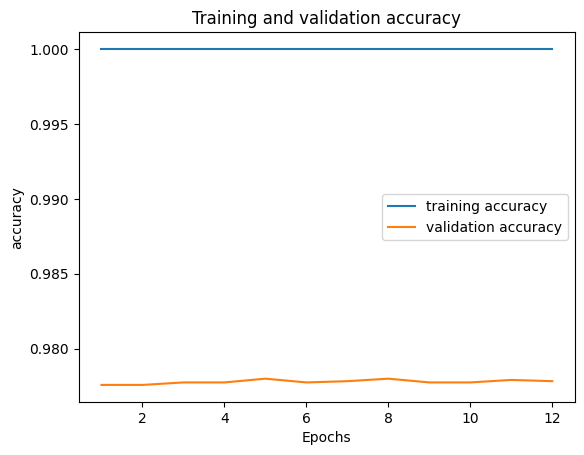

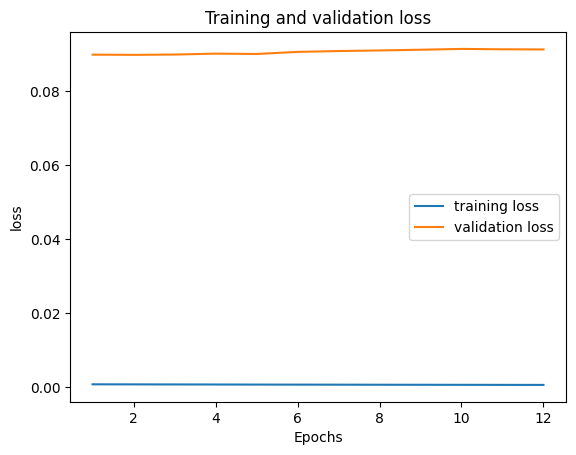

In [15]:
plot_metric(hist, 'accuracy')
plot_metric(hist, 'loss')

## 4-1 [8] 훈련용 집합 및 평가용 집합에 대한 인식률 출력

In [16]:
# 훈련 집합을 대상으로 평가
_, train_acc = model.evaluate(train_imgs, train_labels)
print('훈련 데이터 인식율 = ', train_acc)

# 테스트 집합을 대상으로 평가
_, test_acc = model.evaluate(test_imgs, test_labels)
print('테스트 데이터 인식율 = ', test_acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9995 - loss: 0.0027
훈련 데이터 인식율 =  0.9955166578292847
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9786 - loss: 0.0848
테스트 데이터 인식율 =  0.9821000099182129
